In [1]:
#Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [24]:
#Loading Datasets
shoppers = pd.read_csv("D:/MachineLearning/online_shoppers_intention.csv")

In [25]:
#Snapshot of Dataset
shoppers.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


### Data Preprocessing

In [4]:
LE = LabelEncoder()

In [5]:
shoppers.iloc[:,10] = LE.fit_transform(shoppers['Month'])
shoppers.iloc[:,15] = LE.fit_transform(shoppers['VisitorType'])
shoppers.iloc[:,16] = LE.fit_transform(shoppers['Weekend'])
shoppers.iloc[:,17] = LE.fit_transform(shoppers['Revenue'])

In [6]:
shoppers.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,0,0


In [17]:
#Splitting the Input Variable and Target Variable
out = shoppers['Revenue']
x = shoppers.drop(['Revenue'], axis = 1)

### Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

Xtrain, Xval, Ytrain, Yval = train_test_split(x, out, test_size=0.2, random_state = 60 )

### Model Building

In [20]:
lreg = LogisticRegression()
lreg.fit(Xtrain, Ytrain)
out_pred = lreg.predict(Xval)
out_pred
acc=accuracy_score(Yval, out_pred)


### Validating using K-Fold Validation

In [21]:
from sklearn.model_selection import KFold
model = LogisticRegression()
kfold = KFold(n_splits = 5, shuffle=True)
result = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring='accuracy')
result
result.mean()

0.8819954785136874

### Result Visualization

The Confusion Matrix
The full classification report is as follows
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      2096
          1       0.74      0.36      0.49       370

avg / total       0.87      0.89      0.87      2466



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text yticklabel objects>)

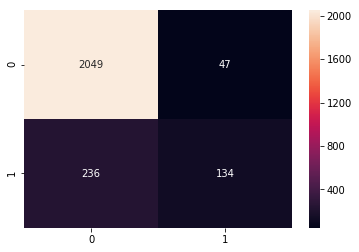

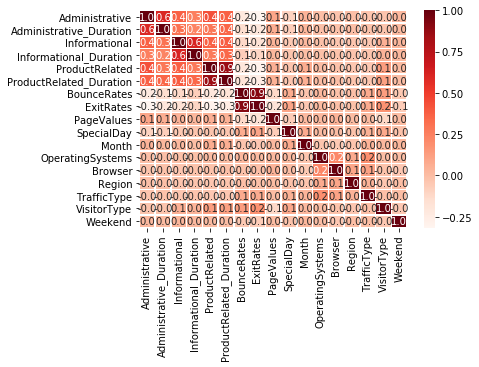

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Yval, out_pred)
print("The Confusion Matrix")
cm
plt.figure()
sns.heatmap(cm, annot =True, fmt = "d")

from sklearn.metrics import classification_report
print("The full classification report is as follows")
print(classification_report(Yval, out_pred))

plt.subplots()
sns.heatmap(x.corr(),annot=True,linewidths=.5,fmt= ".1f", cmap = 'Reds')
plt.yticks(rotation= 0)


### Optimization of Logistic Regression Model 

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_hyp = GridSearchCV(LogisticRegression(), param_grid1)
clf_hyp.fit(Xtrain, Ytrain)
clf_pred = clf_hyp.predict(Xval)
clf_hyp_acc = accuracy_score(Yval, clf_pred)
print("Accuracy after parameter tuning")
print(clf_hyp_acc)
print(clf_hyp.best_estimator_)

Accuracy after parameter tuning
0.8852392538523925
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [13]:
Xtrain, Xval, Ytrain, Yval = train_test_split(x, out, test_size=0.2, random_state = 60 )
lreg = LogisticRegression(C=100)
lreg.fit(Xtrain, Ytrain)
out_pred = lreg.predict(Xval)
out_pred
acc=accuracy_score(Yval, out_pred)
from sklearn.model_selection import KFold
model = LogisticRegression()
kfold = KFold(n_splits = 5, shuffle=True)
result = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring='accuracy')
print(result)
result.mean()

[0.86619361 0.89457679 0.87734415 0.88139888 0.88691684]


0.8812860534045311

The Confusion Matrix
The full classification report is as follows
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      2096
          1       0.74      0.36      0.49       370

avg / total       0.87      0.89      0.87      2466



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text yticklabel objects>)

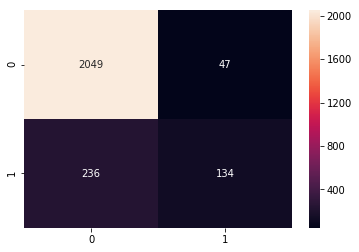

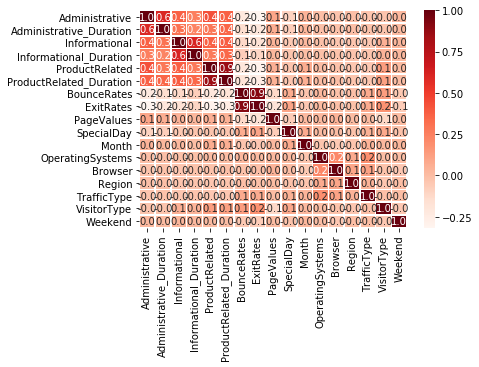

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Yval, out_pred)
print("The Confusion Matrix")
cm
plt.figure()
sns.heatmap(cm, annot =True, fmt = "d")

from sklearn.metrics import classification_report
print("The full classification report is as follows")
print(classification_report(Yval, out_pred))

plt.subplots()
sns.heatmap(x.corr(),annot=True,linewidths=.5,fmt= ".1f", cmap = 'Reds')
plt.yticks(rotation= 0)

### Conclusion:

1.Applying the logistic regression model on Online Shoppers Intention Data and validating 
the reults through KFold Validation technique, We find the accuracy of 88.19%. This would
seem to be High accuracy for prediction.
2.But on further analysis we find that we fail at crucial prediction of who will buy the products ie Revenue='True'. prediction rate of Revenue = 'True' comes out to be 74.1% and further 36.22% of predicted Revenue='True' value are correct. 
3.Upon optimization of model using GridsearchCV, overall perform remains the same.
4.This situation is arising due to high imbalance in data. The ratio of Revenue = True to Tevenue = false is very low which is leading to innacuracy in model prediction.
5.To improve the prediction, we have to treat imbalances in data or do perform feature selection and go for other model like Recursive Neural Networks(RNN)  